In [117]:
from kan import *
import torch
import matplotlib.pyplot as plt
#torch.set_default_dtype(torch.float64)

In [78]:
#f = lambda x: torch.exp((torch.sin(torch.pi*(x[:,[0]]**2+x[:,[1]]**2))+torch.sin(torch.pi*(x[:,[2]]**2+x[:,[3]]**2)))/2)
#f = lambda x: np.exp(np.sin(x[:,0]))
f = lambda x: torch.exp(x[:,0]) * torch.sin(x[:,1])
#f = lambda x: np.sin(x[:,0])
n_var = 2
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
dataset = create_dataset(f, n_var=n_var, train_num=1000, ranges=[-2,2], device=device)
print(device)

cuda


In [79]:
grids = np.array([3,5,10,20,50])
k = 3
model = KAN(width=[n_var, [1,1], 1], grid=3, k=3, seed=1, device=device)
#model = KAN(width=[4,2,1,1], grid=3, k=3, seed=1, device=device)

checkpoint directory created: ./model
saving model version 0.0


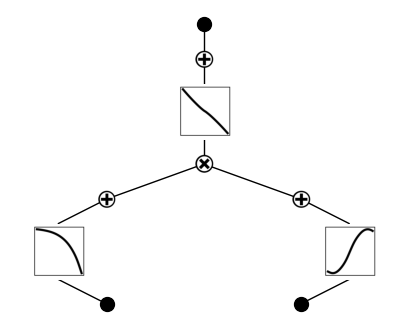

In [94]:
#model.fit(dataset, opt="Adam", steps=30, lamb=1e-3, lamb_entropy=5.)
model.fit(dataset, opt="LBFGS", steps=100, lamb=0.002, lamb_entropy=2.);
#model = model.prune(edge_th=0.15)
model.plot()

In [95]:
steps = 200
train_losses = []
test_losses = []
for i in range(grids.shape[0]):
    print("grid:", grids[i])
    if i == 0:
        model = model.refine(grids[0])
        #model.fit(dataset, opt="LBFGS", steps=steps, lamb=0.002, lamb_entropy=2.)
    if i != 0:
        model = model.refine(grids[i])
    #results = loss = model.fit(dataset, opt="LBFGS", steps=steps)
    results = loss = model.fit(dataset, opt="LBFGS", steps=steps)
    train_losses += results['train_loss']
    test_losses += results['test_loss']
    

grid: 3
saving model version 0.26


| train_loss: 1.79e-02 | test_loss: 1.82e-02 | reg: 1.57e+01 | : 100%|█| 200/200 [00:27<00:00,  7.27


saving model version 0.27
grid: 5
saving model version 0.28


| train_loss: 7.74e-03 | test_loss: 7.79e-03 | reg: 1.59e+01 | : 100%|█| 200/200 [00:50<00:00,  3.98


saving model version 0.29
grid: 10
saving model version 0.30


| train_loss: 4.06e-03 | test_loss: 3.81e-03 | reg: 1.59e+01 | : 100%|█| 200/200 [00:38<00:00,  5.16


saving model version 0.31
grid: 20
saving model version 0.32


| train_loss: 1.49e-03 | test_loss: 1.67e-03 | reg: 1.59e+01 | : 100%|█| 200/200 [00:37<00:00,  5.32


saving model version 0.33
grid: 50
saving model version 0.34


| train_loss: 7.44e-04 | test_loss: 9.55e-04 | reg: 1.62e+01 | : 100%|█| 200/200 [00:34<00:00,  5.72

saving model version 0.35


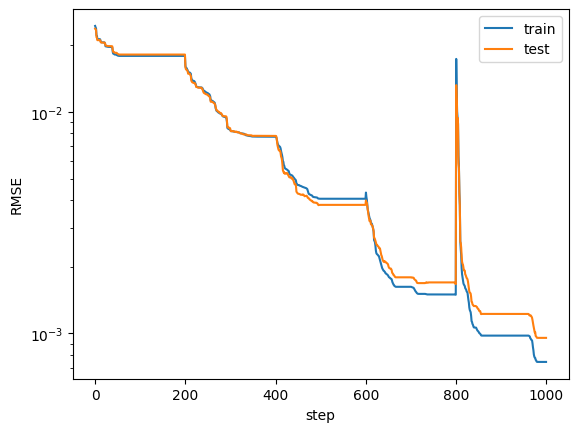

In [96]:
plt.plot(train_losses)
plt.plot(test_losses)
plt.legend(['train', 'test'])
plt.ylabel('RMSE')
plt.xlabel('step')
plt.yscale('log')

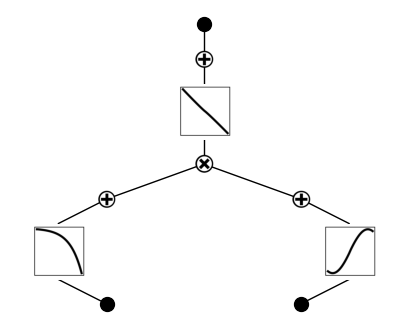

In [101]:
model.plot()

| train_loss: 3.36e-05 | test_loss: 3.29e-05 | reg: 0.00e+00 | : 100%|█| 50/50 [00:07<00:00,  6.90it


saving model version 0.38


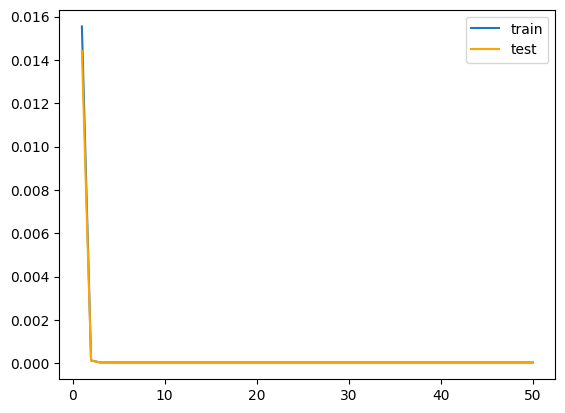

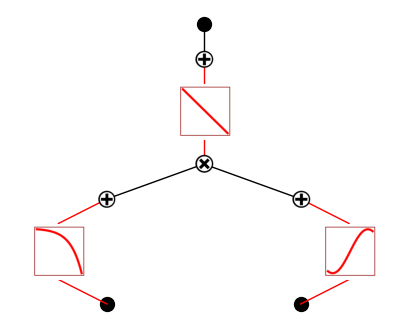

In [106]:
steps = 50
#model.grid = grids[0]
#model = model.refine(100)
loss = model.fit(dataset, opt="LBFGS", steps=steps)
# plot cuda loss0
rsteps = np.arange(1, steps+1)
train_loss = np.array(loss['train_loss'])
test_loss = np.array(loss['test_loss'])
plt.plot(rsteps, train_loss, label="train")
plt.plot(rsteps, test_loss, color='orange', label="test")
plt.legend()
plt.show()
model.plot()

| train_loss: 2.05e-15 | test_loss: 1.66e-15 | reg: 0.00e+00 | : 100%|█| 30/30 [00:02<00:00, 12.14it

saving model version 0.13


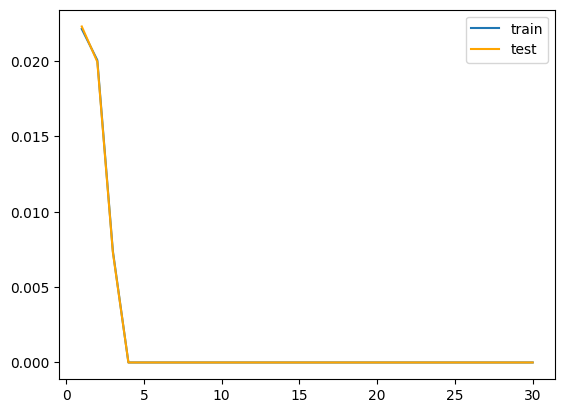

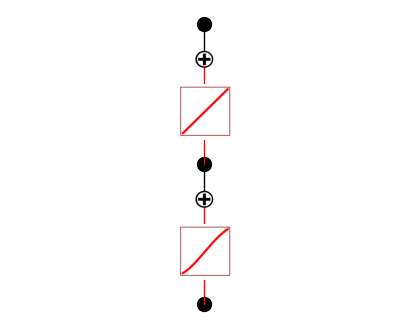

In [17]:
# CUDA train
model.to(cuda)
steps = 30
#loss = model.fit(cuda_dataset, opt="Adam", steps=steps, lamb=1e-3, lamb_entropy=5.)
#loss = model.fit(cuda_dataset, steps=steps, lamb=1e-3, lamb_entropy=5.)
#loss = model.fit(cuda_dataset, steps=steps, lamb=0.01, lamb_coef=1.0)
loss = model.fit(cuda_dataset, opt="LBFGS", steps=steps)


# plot cuda loss0
rsteps = np.arange(1, steps+1)
train_loss = np.array(loss['train_loss'])
test_loss = np.array(loss['test_loss'])
plt.plot(rsteps, train_loss, label="train")
plt.plot(rsteps, test_loss, color='orange', label="test")
plt.legend()
plt.show()
model.plot()

keep: [True, False]
saving model version 0.10


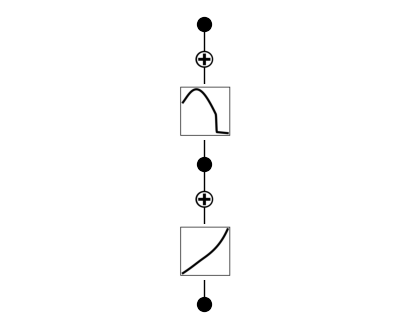

In [61]:
# CPU switch
# prune model
#model = model.prune_node(threshold=0.25)
model = model.prune_input()
#model = model.prune()
model.plot()

In [105]:
# CPU switch
# model auto symbolic
model.auto_symbolic()
#model.suggest_symbolic(0,0,0)
#model.suggest_symbolic(0,0,1)
#model.suggest_symbolic(1,0,0)
#model.fix_symbolic(0,0,0,'exp')
#model.fix_symbolic(0,1,0,'sin')
#model.unfix_symbolic(1,0,0)

fixing (0,0,0) with exp, r2=1.0000001192092896, c=2
skipping (0,0,1) since already symbolic
skipping (0,1,0) since already symbolic
fixing (0,1,1) with cos, r2=0.9998950958251953, c=2
fixing (1,0,0) with x, r2=0.9991072416305542, c=1
saving model version 0.37


In [107]:
# CPU switch
# get symbolic formula
print(model.symbolic_formula())
sf = model.symbolic_formula()[0][0]
nsimplify(ex_round(ex_round(sf, 3),3))

([-41.8611056868799*(-0.0407224528214291*exp(0.999997556209564*x_1) + 8.37751130688957e-8*sin(10.0000095367432*x_2 + 10.0000057220459) + 2.83796907751821e-7)*(-0.586621403694153*cos(1.00000047683716*x_2 + 1.57079637050629) - 2.05403193831444e-6 - 0.000324135937262326*exp(-100.0*(-x_1 - 1)**2)) + 1.2687278285739e-5], [x_1, x_2])


-994*exp(x_1)*cos(x_2 + 1571/1000)/993

# 通用拟合器

In [136]:
m = KAN(width=[5,[5,1],1], base_fun="identity", device=device, mult_arity=2)
f = lambda x : x[:,0]**2 + 1/x[:,1]**2 + torch.exp(x[:,2]) + torch.log(x[:,3]) + torch.sin(x[:,4]) #+ torch.arcsin(x[:,5])
d = create_dataset(f, n_var=5, ranges=[1,3], device=device)

checkpoint directory created: ./model
saving model version 0.0


In [137]:
l = m.fit(d, steps=1)

| train_loss: 4.29e-01 | test_loss: 4.48e-01 | reg: 3.24e+01 | : 100%|█| 1/1 [00:00<00:00,  2.26it/s

saving model version 0.1


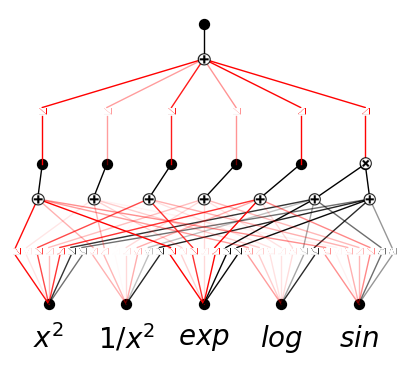

In [143]:
#m.get_act(d)
invars = symbols("x^2 1/x^2 exp log sin")
m.plot(beta=10, in_vars=invars)

In [139]:
expr = ["x^2", "1/x^2", "exp", "log", "sin"]
for i in range(5):
    for j in range(5):
        m.fix_symbolic(0, i, j, expr[i])
for i in range(6):
    m.fix_symbolic(1, i, 0, "x")

r2 is 0.9877404570579529
saving model version 0.2
r2 is 0.8205122947692871
r2 is not very high, please double check if you are choosing the correct symbolic function.
saving model version 0.3
r2 is 0.9993430376052856
saving model version 0.4
r2 is 0.995173454284668
saving model version 0.5
r2 is 0.9934214353561401
saving model version 0.6
r2 is 0.8875402212142944
r2 is not very high, please double check if you are choosing the correct symbolic function.
saving model version 0.7
r2 is 0.9956770539283752
saving model version 0.8
r2 is 0.9898569583892822
saving model version 0.9
r2 is 0.984735906124115
saving model version 0.10
r2 is 0.6954630613327026
r2 is not very high, please double check if you are choosing the correct symbolic function.
saving model version 0.11
r2 is 0.9921998381614685
saving model version 0.12
r2 is 0.8618956208229065
r2 is not very high, please double check if you are choosing the correct symbolic function.
saving model version 0.13
r2 is 0.9990683794021606
savin

In [142]:
help(model.plot)

Help on method plot in module kan.MultKAN:

plot(folder='./figures', beta=3, metric='backward', scale=0.5, tick=False, sample=False, in_vars=None, out_vars=None, title=None, varscale=1.0) method of kan.MultKAN.MultKAN instance
    plot KAN
    
    Args:
    -----
        folder : str
            the folder to store pngs
        beta : float
            positive number. control the transparency of each activation. transparency = tanh(beta*l1).
        mask : bool
            If True, plot with mask (need to run prune() first to obtain mask). If False (by default), plot all activation functions.
        mode : bool
            "supervised" or "unsupervised". If "supervised", l1 is measured by absolution value (not subtracting mean); if "unsupervised", l1 is measured by standard deviation (subtracting mean).
        scale : float
            control the size of the diagram
        in_vars: None or list of str
            the name(s) of input variables
        out_vars: None or list of st

# 初等函数拟合

In [2]:
n_var = 2
cpu = torch.device('cpu')

In [152]:
f = lambda x : x[:, 0]**2
cpu_dataset = create_dataset(f, n_var=n_var, ranges=[-1, 1], train_num=1000)

In [153]:
model = KAN(width=[2,1], base_fun="identity")
#model = KAN(width=[2,[5,2],1], base_fun="identity", mult_arity=2)

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 5.91e-17 | test_loss: 6.08e-17 | reg: 0.00e+00 | : 100%|█| 30/30 [00:00<00:00, 109.89i


saving model version 0.6


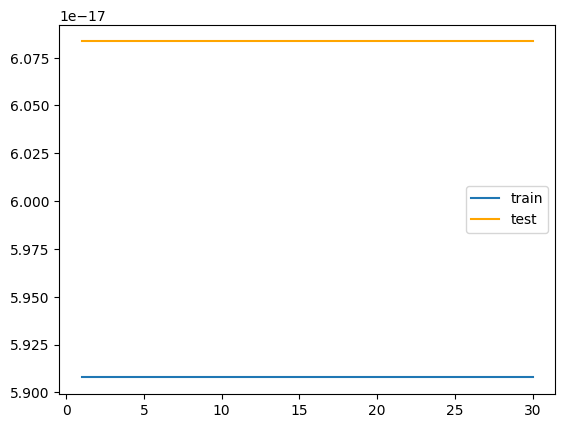

In [162]:
steps = 30
#loss2 = model.fit(cpu_dataset, steps=steps, lamb=0.01, lamb_coef=1)
loss2 = model.fit(cpu_dataset, steps=steps)

# plot cpu loss
rsteps = np.arange(1, steps+1)
train_loss = np.array(loss2['train_loss'])
test_loss = np.array(loss2['test_loss'])
plt.plot(rsteps, train_loss, label="train")
plt.plot(rsteps, test_loss, color='orange', label="test")
plt.legend()

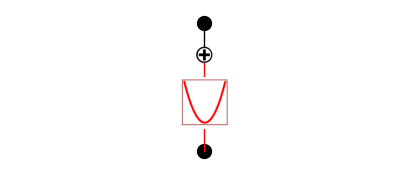

In [163]:
model.plot()

keep: [True, False]
saving model version 0.2


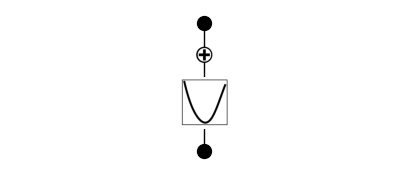

In [156]:
# prune model
#model = model.prune_node(threshold=0.25)
model = model.prune_input()
#model = model.prune()
model.plot()

In [161]:
# CPU switch
# model auto symbolic
model.auto_symbolic()
#model.suggest_symbolic(0,0,0)

fixing (0,0,0) with x^2, r2=0.9999999999988614, c=2
saving model version 0.5


In [164]:
# CPU switch
# get symbolic formula
print(model.symbolic_formula())
sf = model.symbolic_formula()[0][0]
nsimplify(ex_round(ex_round(sf, 3),3))

([1.0*(-x_1 - 3.46246388089971e-17)**2 + 1.53964474217186e-18], [x_1])


x_1**2

# 初等函数导入

In [145]:
from kan import *
import torch
import matplotlib.pyplot as plt
from kan.compiler import sf2kan
from sympy import *
from kan.utils import create_dataset
torch.set_default_dtype(torch.float64)

input_variables = x, y = symbols('x y')
n_var = 2

In [146]:
models = [] # x^2, x^(-2), sin(x), asin(x), 2^x, log(2)(x)
datasets = []
functions = []
simplifications = []

## $f(x)=x^2$

keep: [True, False]


x_1**2

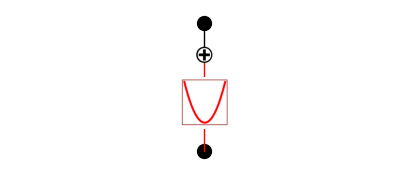

In [147]:
f = lambda x : x[:, 0]**2
dataset = create_dataset(f, n_var=n_var, ranges=[-1,1])
expr = x**2
model = sf2kan(input_variables, expr)
model.get_act(dataset)
model = model.prune_input()
model.plot()
#plt.savefig("E:/超算三组/x^2.png")
sf = model.symbolic_formula()[0][0]

models.append(model)
datasets.append(dataset)
functions.append(f)
simplifications.append(nsimplify(ex_round(ex_round(sf, 3),3)))
nsimplify(ex_round(ex_round(sf, 3),3))

## $f(x)=\frac{1}{x^2}$

keep: [True, False]


x_1**(-2)

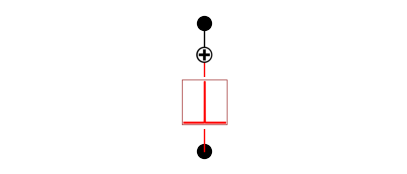

In [177]:
f = lambda x : 1/x[:, 0]**2
dataset = create_dataset(f, n_var=n_var, ranges=[-1,1])
expr = 1/x**2
model = sf2kan(input_variables, expr)
model.get_act(dataset)
model = model.prune_input()
model.get_act(dataset)
model.plot()
plt.savefig("E:/超算三组/x^(-2).png")
sf = model.symbolic_formula()[0][0]

models.append(model)
datasets.append(dataset)
functions.append(f)
simplifications.append(nsimplify(ex_round(ex_round(sf, 3),3)))

nsimplify(ex_round(ex_round(sf, 3),3))

## $f(x)=e^x$

keep: [True, False]


exp(x_1)

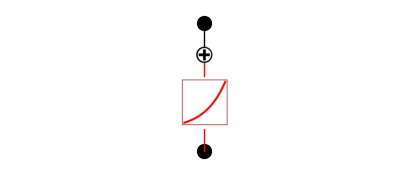

In [178]:
f = lambda x : np.exp(x[:, 0])
dataset = create_dataset(f, n_var=n_var, ranges=[-1,1])
expr = exp(x)
model = sf2kan(input_variables, expr)
model.get_act(dataset)
model = model.prune_input()
model.get_act(dataset)
model.plot()
plt.savefig("E:/超算三组/e^x.png")
sf = model.symbolic_formula()[0][0]

models.append(model)
datasets.append(dataset)
functions.append(f)
simplifications.append(nsimplify(ex_round(ex_round(sf, 3),3)))

nsimplify(ex_round(ex_round(sf, 3),3))

## $f(x)=\ln{x}$

keep: [True, False]


log(x_1)

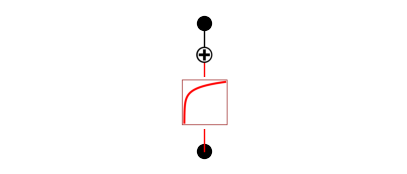

In [179]:
f = lambda x : np.log(x[:, 0])
dataset = create_dataset(f, n_var=n_var, ranges=[1e-5,3])
expr = log(x)
model = sf2kan(input_variables, expr)
model.get_act(dataset)
model = model.prune_input()
model.get_act(dataset)
model.plot()
plt.savefig("E:/超算三组/ln(x).png")
sf = model.symbolic_formula()[0][0]

models.append(model)
datasets.append(dataset)
functions.append(f)
simplifications.append(nsimplify(ex_round(ex_round(sf, 3),3)))

nsimplify(ex_round(ex_round(sf, 3),3))

## $f(x)=\sin{x}$

keep: [True, False]


sin(x_1)

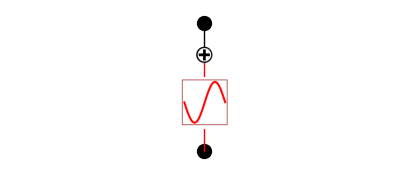

In [180]:
f = lambda x : np.sin(x[:, 0])
dataset = create_dataset(f, n_var=n_var, ranges=[-np.pi,np.pi])
expr = sin(x)
model = sf2kan(input_variables, expr)
model.get_act(dataset)
model = model.prune_input()
model.get_act(dataset)
model.plot()
plt.savefig("E:/超算三组/sin(x).png")
sf = model.symbolic_formula()[0][0]

models.append(model)
datasets.append(dataset)
functions.append(f)
simplifications.append(nsimplify(ex_round(ex_round(sf, 3),3)))

nsimplify(ex_round(ex_round(sf, 3),3))

## $f(x)=\arcsin{x}$

keep: [True, False]


asin(x_1)

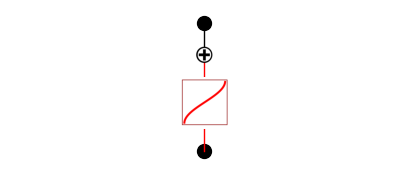

In [88]:
f = lambda x : np.arcsin(x[:, 0])
dataset = create_dataset(f, n_var=n_var, ranges=[-1,1])
expr = asin(x)
model = sf2kan(input_variables, expr)
model.get_act(dataset)
model = model.prune_input()
model.get_act(dataset)
model.plot()
plt.savefig("E:/超算三组/asin(x).png")
sf = model.symbolic_formula()[0][0]

models.append(model)
datasets.append(dataset)
functions.append(f)
simplifications.append(nsimplify(ex_round(ex_round(sf, 3),3)))

nsimplify(ex_round(ex_round(sf, 3),3))

# General Nonlinear Layer

In [3]:
n_var = 5
cpu = torch.device('cpu')
functions = []
functions.append(lambda x : x[:, 0]**2)
functions.append(lambda x : 1/x[:, 1]**2)
functions.append(lambda x : torch.exp(x[:,2]))
functions.append(lambda x : torch.log(x[:,3]))
functions.append(lambda x : torch.sin(x[:, 4]))
functions.append(lambda x : torch.arcsin(x[:,5]))
f = lambda x : x[:,0]**2 + 1/x[:,1]**2 + torch.exp(x[:,2]) + torch.log(x[:,3]) + torch.sin(x[:,4]) #+ torch.arcsin(x[:,5])
#input_variables = x1, x2, x3, x4, x5, x6 = symbols('x1 x2 x3 x4 x5 x6')
input_variables = x1, x2, x3, x4, x5 = symbols('x1 x2 x3 x4 x5')
print(input_variables)

(x1, x2, x3, x4, x5)


In [4]:
#str_expr = "x1**2 + 1/x2**2 + exp(x3) + log(x4) + sin(x5) + asin(x6)"
#expr = sympify(str_expr)
expr = x1**2 + 1/x2**2 + exp(x3) + log(x4) + sin(x5) #+ asin(x6)
print(expr)
cpu_dataset = create_dataset(f, n_var=n_var, ranges=[0.1,1], train_num=1000)

x1**2 + exp(x3) + log(x4) + sin(x5) + x2**(-2)


x_1**2 + exp(x_3) + log(x_4) + sin(x_5) + x_2**(-2)

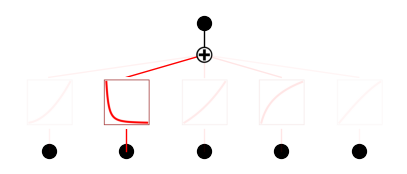

In [5]:
model = sf2kan(input_variables, expr)
model.get_act(cpu_dataset)
#model = model.prune_input()
model.plot()
#plt.savefig("E:/超算三组/x^(-2).png")
sf = model.symbolic_formula()[0][0]
nsimplify(ex_round(ex_round(sf, 3),3))

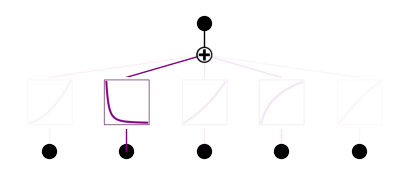

In [6]:
model.perturb(mode="all")
model.get_act(cpu_dataset)
model.plot()
train_func = lambda x : torch.exp(x[:, 0]) + torch.sin(x[:, 2])
train_dataset = create_dataset(train_func, n_var=n_var, ranges=[0.1, 1])

| train_loss: 1.86e-04 | test_loss: 1.95e-04 | reg: 1.10e+00 | : 100%|█| 200/200 [00:33<00:00,  5.91


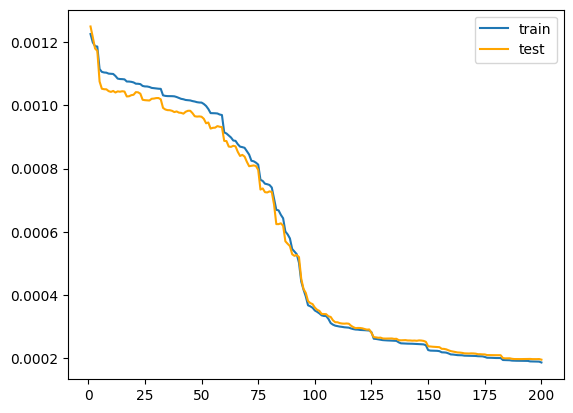

In [146]:
steps = 200
#loss2 = model.fit(cpu_dataset, steps=steps, lamb=0.01, lamb_coef=1)
loss2 = model.fit(train_dataset, steps=steps)

# plot cpu loss
rsteps = np.arange(1, steps+1)
train_loss = np.array(loss2['train_loss'])
test_loss = np.array(loss2['test_loss'])
plt.plot(rsteps, train_loss, label="train")
plt.plot(rsteps, test_loss, color='orange', label="test")
plt.legend()

In [148]:
model.suggest_symbolic(0,0,0)
model.suggest_symbolic(0,2,0)

    function  fitting r2    r2 loss  complexity  complexity loss  total loss
0        exp    1.000000 -16.592187           2                2   -1.718437
1      1/x^2    0.999990 -15.590204           2                2   -1.518041
2        1/x    0.999980 -15.012545           2                2   -1.402509
3    1/x^0.5    0.999964 -14.423153           2                2   -1.284631
4  1/sqrt(x)    0.999964 -14.423153           2                2   -1.284631
  function  fitting r2    r2 loss  complexity  complexity loss  total loss
0      sin    1.000000 -16.575969           2                2   -1.715194
1      cos    0.999999 -16.536394           2                2   -1.707279
2      x^2    0.999924 -13.504870           2                2   -1.100974
3      exp    0.999858 -12.683174           2                2   -0.936635
4    1/x^2    0.999830 -12.441178           2                2   -0.888236


('sin',
 (<function kan.utils.<lambda>(x)>,
  <function kan.utils.<lambda>(x)>,
  2,
  <function kan.utils.<lambda>(x, y_th)>),
 0.9999997638643022,
 2)

checkpoint directory created: ./model
saving model version 0.0


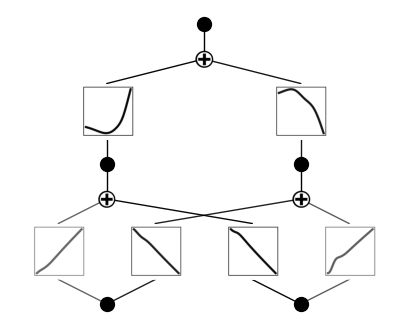

In [147]:
m = KAN(width=[2, 2, 1])
#ff = lambda x : torch.sin(x[:,0]) + torch.exp(x[:,1]) + torch.log(x[:,2]) + x[:,3]**2 + x[:,4]**3
ff = lambda x : torch.sin(x[:,0]) + torch.log(x[:,1])
d = create_dataset(ff, n_var=2, ranges=[0.1, 6])
m.get_act(d)
m.plot()
#model = KAN(width=[2,[5,2],1], base_fun="identity", mult_arity=2)

| train_loss: 1.72e-09 | test_loss: 6.71e-11 | reg: 0.00e+00 | : 100%|█| 30/30 [00:00<00:00, 46.54it


saving model version 0.7


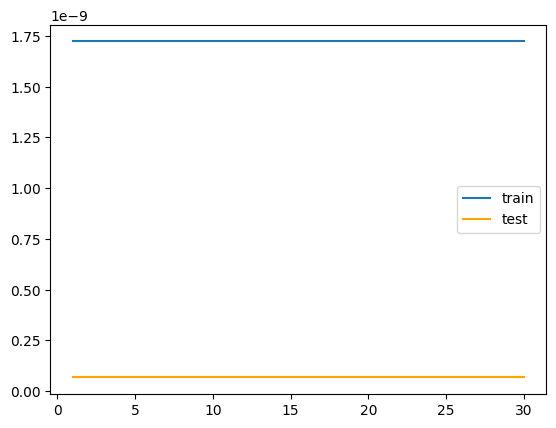

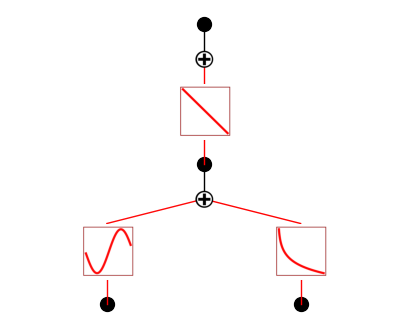

In [161]:
steps = 30
#loss2 = m.fit(d, steps=steps, lamb=0.01, lamb_coef=1)
loss2 = m.fit(d, steps=steps)

# plot cpu loss
rsteps = np.arange(1, steps+1)
train_loss = np.array(loss2['train_loss'])
test_loss = np.array(loss2['test_loss'])
plt.plot(rsteps, train_loss, label="train")
plt.plot(rsteps, test_loss, color='orange', label="test")
plt.legend()
plt.show()
m.plot()

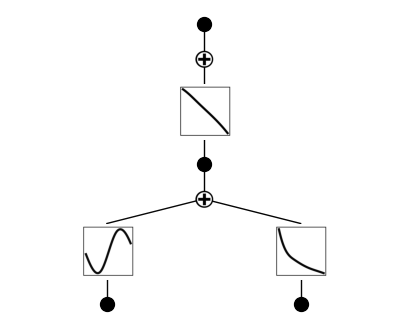

In [153]:
m.plot()

In [152]:
m = m.prune()
#m = m.prune_node(threshold=0.15)

saving model version 0.4


In [155]:
m.auto_symbolic()

fixing (0,0,0) with cos, r2=0.9988398486445244, c=2
fixing (0,1,0) with log, r2=0.9985910448892051, c=2
fixing (1,0,0) with x, r2=0.9993042506221794, c=1
saving model version 0.5


In [154]:
# CPU switch
# model auto symbolic
#model.auto_symbolic()
m.suggest_symbolic(0,0,0)
m.suggest_symbolic(0,1,0)
#m.suggest_symbolic(1,0,0)
#m.suggest_symbolic(1,1,0)
#m.suggest_symbolic(0,2,0)
#m.suggest_symbolic(0,3,0)
#m.suggest_symbolic(0,4,0)

  function  fitting r2   r2 loss  complexity  complexity loss  total loss
0      cos    0.998840 -9.739089           2                2   -0.347818
1      sin    0.998840 -9.739089           2                2   -0.347818
2        0    0.000000  0.000014           0                0    0.000003
3        x    0.685613 -1.669343           1                1    0.466131
4      x^2    0.693390 -1.705478           2                2    1.258904
    function  fitting r2   r2 loss  complexity  complexity loss  total loss
0        log    0.998591 -9.460955           2                2   -0.292191
1    1/x^0.5    0.998501 -9.372636           2                2   -0.274527
2  1/sqrt(x)    0.998501 -9.372636           2                2   -0.274527
3        1/x    0.997153 -8.451405           2                2   -0.090281
4          0    0.000000  0.000014           0                0    0.000003


('log',
 (<function kan.utils.<lambda>(x)>,
  <function kan.utils.<lambda>(x)>,
  2,
  <function kan.utils.<lambda>(x, y_th)>),
 0.9985910448892051,
 2)

In [162]:
# CPU switch
# get symbolic formula
print(m.symbolic_formula())
sf = m.symbolic_formula()[0][0]
nsimplify(ex_round(ex_round(sf, 3),3))

([1.00000000009128*log(7.01747700784102*x_2 + 4.13419748898749e-10) - 1.00000000003817*cos(1.00000000004125*x_1 + 1.57079632665081) - 1.94840375315152], [x_1, x_2])


log(7*x_2) - cos(x_1 + 1571/1000) - 487/250

In [160]:
np.log(7) - 487/250

-0.002089850944686722

In [182]:
for m, d, f, s in zip(models, datasets, functions, simplifications):
    print(s)

x_1**2
x_1**(-2)
exp(x_1)
log(x_1)
sin(x_1)
asin(x_1)


In [86]:
expr = exp(x)
print(expr)

exp(x)


In [137]:
help(m)

Help on MultKAN in module kan.MultKAN object:

class MultKAN(torch.nn.modules.module.Module)
 |  MultKAN(width=None, grid=3, k=3, mult_arity=2, noise_scale=1.0, scale_base_mu=0.0, scale_base_sigma=1.0, base_fun='silu', symbolic_enabled=True, affine_trainable=False, grid_eps=1.0, grid_range=[-1, 1], sp_trainable=True, sb_trainable=True, seed=1, save_act=True, sparse_init=False, auto_save=True, first_init=True, ckpt_path='./model', state_id=0, round=0)
 |  
 |  Method resolution order:
 |      MultKAN
 |      torch.nn.modules.module.Module
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, width=None, grid=3, k=3, mult_arity=2, noise_scale=1.0, scale_base_mu=0.0, scale_base_sigma=1.0, base_fun='silu', symbolic_enabled=True, affine_trainable=False, grid_eps=1.0, grid_range=[-1, 1], sp_trainable=True, sb_trainable=True, seed=1, save_act=True, sparse_init=False, auto_save=True, first_init=True, ckpt_path='./model', state_id=0, round=0)
 |      Initialize internal

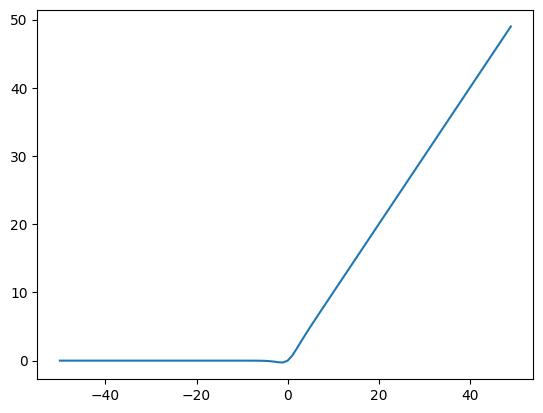

In [167]:
x = np.arange(-50, 50)
x = torch.tensor(x, dtype=float)
s = torch.nn.SiLU()
y = s(x)
#print(y)
plt.plot(x, y)

In [ ]:
os.environ["CUBLAS_WORKSPACE_CONFIG"]=":4096:8"
torch.cuda.is_available()

In [168]:
dir(torch.nn)

['AdaptiveAvgPool1d',
 'AdaptiveAvgPool2d',
 'AdaptiveAvgPool3d',
 'AdaptiveLogSoftmaxWithLoss',
 'AdaptiveMaxPool1d',
 'AdaptiveMaxPool2d',
 'AdaptiveMaxPool3d',
 'AlphaDropout',
 'AvgPool1d',
 'AvgPool2d',
 'AvgPool3d',
 'BCELoss',
 'BCEWithLogitsLoss',
 'BatchNorm1d',
 'BatchNorm2d',
 'BatchNorm3d',
 'Bilinear',
 'CELU',
 'CTCLoss',
 'ChannelShuffle',
 'CircularPad1d',
 'CircularPad2d',
 'CircularPad3d',
 'ConstantPad1d',
 'ConstantPad2d',
 'ConstantPad3d',
 'Container',
 'Conv1d',
 'Conv2d',
 'Conv3d',
 'ConvTranspose1d',
 'ConvTranspose2d',
 'ConvTranspose3d',
 'CosineEmbeddingLoss',
 'CosineSimilarity',
 'CrossEntropyLoss',
 'CrossMapLRN2d',
 'DataParallel',
 'Dropout',
 'Dropout1d',
 'Dropout2d',
 'Dropout3d',
 'ELU',
 'Embedding',
 'EmbeddingBag',
 'FeatureAlphaDropout',
 'Flatten',
 'Fold',
 'FractionalMaxPool2d',
 'FractionalMaxPool3d',
 'GELU',
 'GLU',
 'GRU',
 'GRUCell',
 'GaussianNLLLoss',
 'GroupNorm',
 'Hardshrink',
 'Hardsigmoid',
 'Hardswish',
 'Hardtanh',
 'HingeEmbed